In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
heart = pd.read_csv(r'C:\Users\USER\Downloads\Hearts.csv')

In [39]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [45]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        301 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.3+ KB


In [41]:
heart.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [42]:
heart['Ca'].fillna(heart['Ca'].mean().round(2), inplace=True) # filled the missing values in Ca column with mean

C:\Users\USER\AppData\Local\Temp\ipykernel_8424\841834980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['Ca'].fillna(heart['Ca'].mean().round(2), inplace=True) # filled the missing values in Ca column with mean


In [43]:
heart.dropna(subset=['Thal'], inplace=True) # drop null from Thal colunmn


In [44]:
heart.drop('Unnamed: 0', axis=1, inplace=True) # drop unwanted column


In [52]:
X = heart[['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Thal']]
X = pd.get_dummies(X, drop_first=False)
y = heart['AHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [53]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [54]:
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No', 'Yes']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.86      0.87        59
         Yes       0.81      0.83      0.82        41

    accuracy                           0.85       100
   macro avg       0.84      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100


Confusion Matrix:
 [[51  8]
 [ 7 34]]


In [57]:
import pandas as pd
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Absolute Value'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Value', ascending=False)

print("\nFeature importance (by coefficient):")
print(coefficients)


Feature importance (by coefficient):
                   Feature  Coefficient  Absolute Value
10                      Ca     1.455835        1.455835
1                      Sex     0.612044        0.612044
12    ChestPain_nonanginal    -0.542370        0.542370
2                   RestBP     0.508702        0.508702
11  ChestPain_asymptomatic     0.507544        0.507544
7                    ExAng     0.445133        0.445133
17         Thal_reversable     0.418672        0.418672
9                    Slope     0.408297        0.408297
16             Thal_normal    -0.350055        0.350055
6                    MaxHR    -0.340894        0.340894
8                  Oldpeak     0.322907        0.322907
3                     Chol     0.276585        0.276585
14       ChestPain_typical    -0.249707        0.249707
13    ChestPain_nontypical     0.165243        0.165243
15              Thal_fixed    -0.136109        0.136109
5                  RestECG     0.105575        0.105575
4         

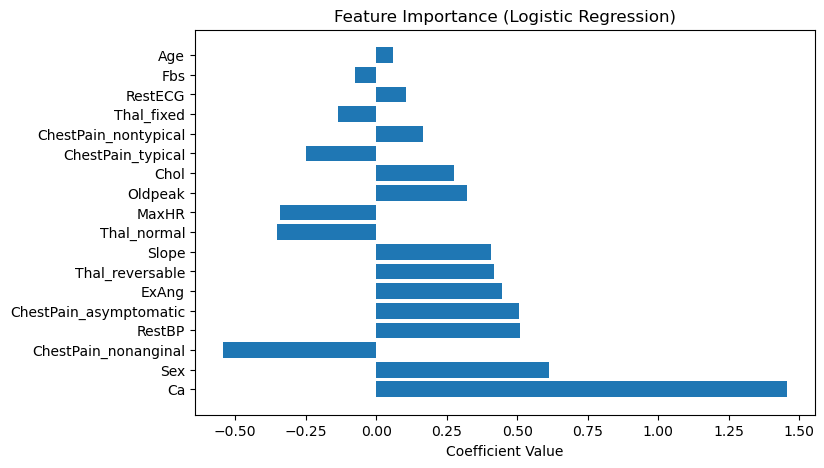

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.show()
